<a href="https://colab.research.google.com/github/jaapsant/docs/blob/master/Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [0]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [0]:
IMAGE_DIRECTORY = '/content/drive/My Drive/women'
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [0]:
def get_colors(image, number_of_colors, show_chart):
    # modify and reshape image
    modified_image = cv2.resize(image, (400, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    # color based clustering
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_
    # Get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors#[1:len(rgb_colors)]

In [0]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 3): 
    # select image colors
    image_colors = get_colors(image, number_of_colors, False)
    image_colors = image_colors[1:len(image_colors)]
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    # magic happens (colors are matched...)
    select_image = False
    for i in range(1,number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i-1]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [0]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    #loop over images and match by color
    for i in range(len(images)):
      #I want a max of 5 recommendations (faster, easier)
      if index > 5:
        break
      selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
      #if match is found plot image
      if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1


#a27173
True
False
True
True
False
True
False
False
True


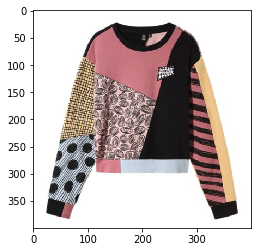

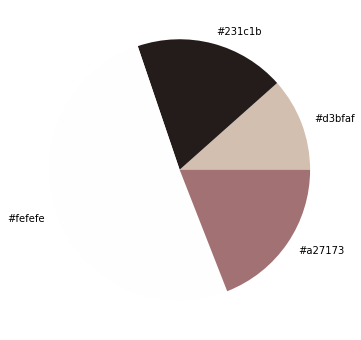

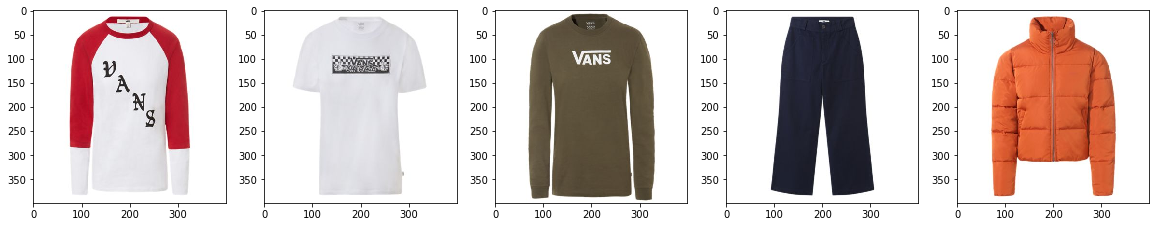

In [28]:
#select image
image = get_image('/content/drive/My Drive/women/NightmareSallyWomen.jpeg')
plt.imshow(image)
#get top 4 colors from image
search_color = get_colors(image, 4, True)

# plot piechart of the 4 colors
plt.figure(figsize = (20, 10))

# select 5 images based on the top 4 colors matching with color 3 (first is always white background)
show_selected_images(images, search_color[3], 10, 4)